In [1]:
import pandas as pd
import numpy as np

In [2]:
car_df = pd.read_csv('train-data.csv')


In [3]:
car_df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
car_df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:

car_df.drop('Unnamed: 0', axis=1, inplace = True)
car_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [7]:
car_df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [8]:
# New Price have 90% of null entry so we can exclude that feature 
car_df.drop(['New_Price'], axis=1, inplace = True)
car_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


### Cleaning and Pre Processing

In [9]:
def mileage_str_split(milleage):
    if str(type(milleage)) not in '<class \'float\'>':
        num = milleage.split()[0]
        if "null" in milleage:
            return float(0)
        else:
            return float(num)
    else:
        return milleage
    
def str_split(milleage):
    if str(type(milleage)) not in '<class \'float\'>':
        num = milleage.split()[0]
        if "null" in milleage:
            return ""
        else:
            return num
    else:
        return milleage

In [10]:
# car_df["Mileage"].fillna(0)

car_df["Mileage"] = car_df["Mileage"].apply(lambda x : mileage_str_split(x))
car_df["Engine"] = car_df["Engine"].apply(lambda x : mileage_str_split(x))
car_df["Power"] = car_df["Power"].apply(lambda x : mileage_str_split(x))
car_df["Brand"] = car_df["Name"].apply(lambda x : str_split(x))
car_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


### Visualize the data

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

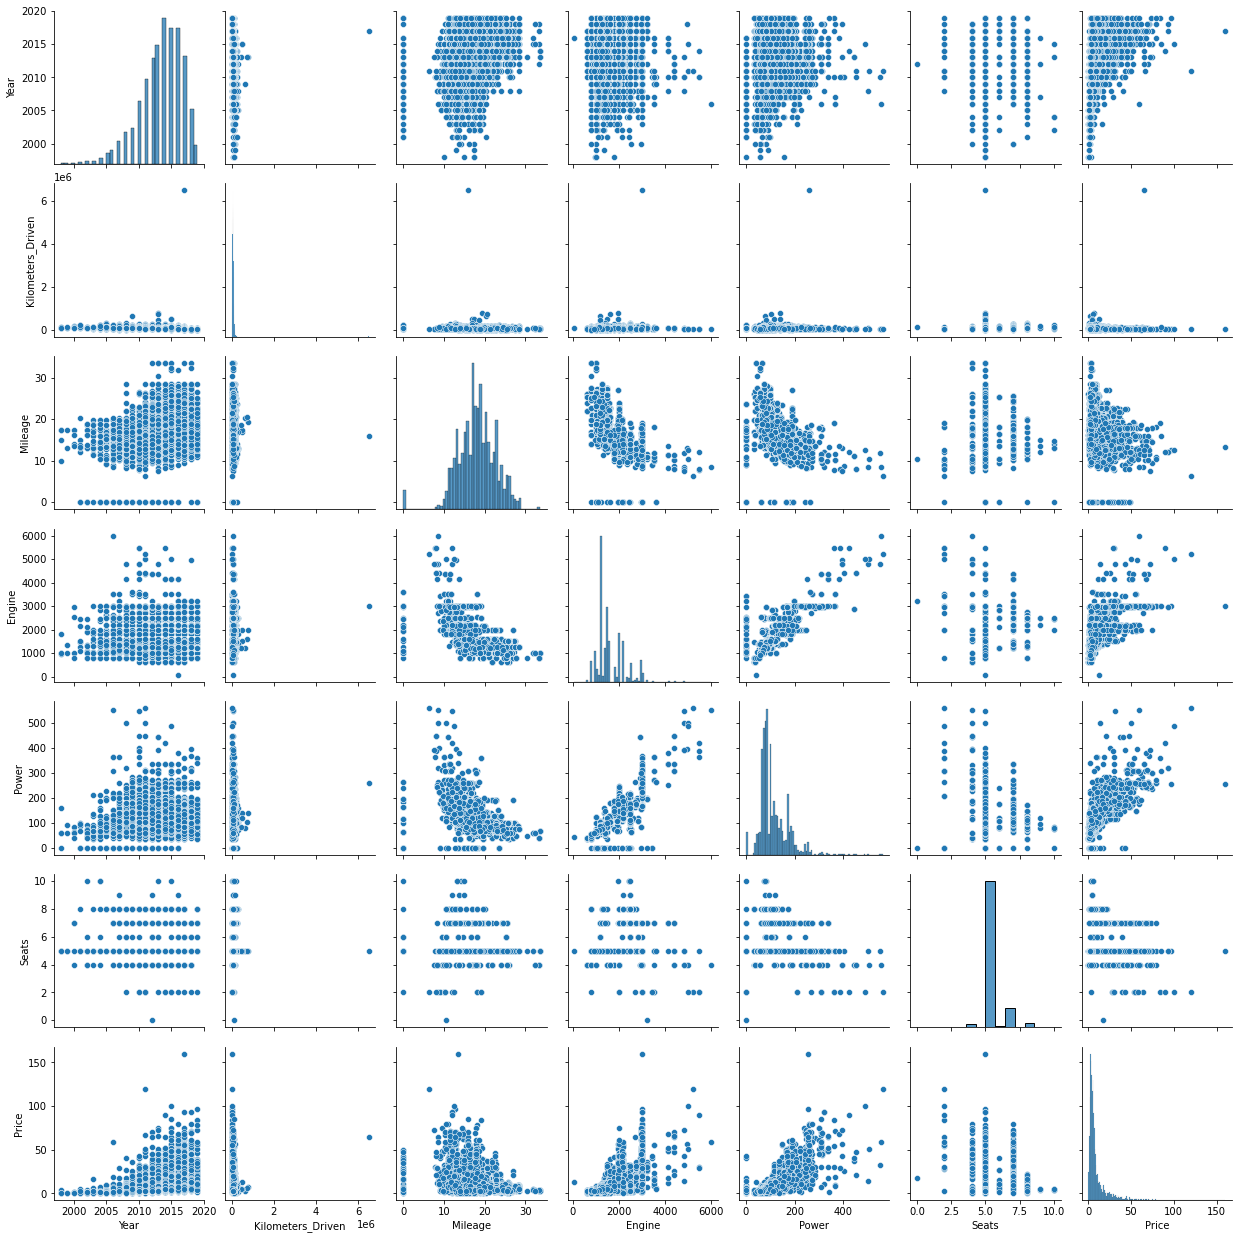

In [12]:
sns.pairplot(car_df)

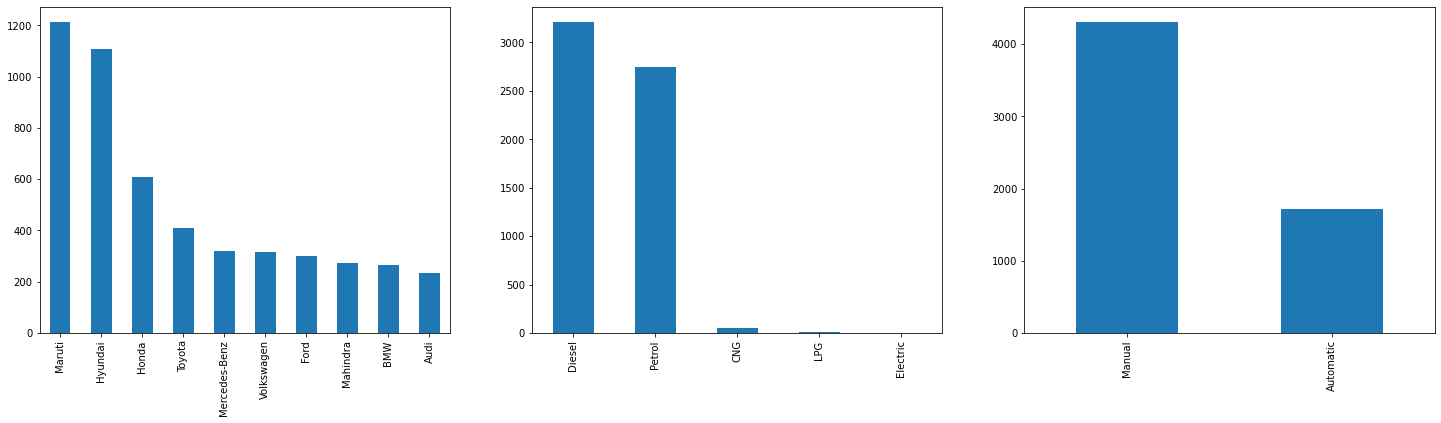

In [13]:
plt.figure(figsize=(25,6))
# Most number of cars selling 
plt.subplot(1,3, 1)
plt1 = car_df["Brand"].value_counts().head(10).plot(kind = 'bar')

# each brand avg price range
plt.subplot(1,3, 2)
plt2 = car_df["Fuel_Type"].value_counts().plot(kind = 'bar')

plt.subplot(1,3, 3)
plt2 = car_df["Transmission"].value_counts().plot(kind = 'bar')



### Inference
    1. Maruthi and Hyundai car are most selling cars
    2. Diesel and Petrol cars are dominating market
    3. Manual transmission cars are more then automatic cars

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

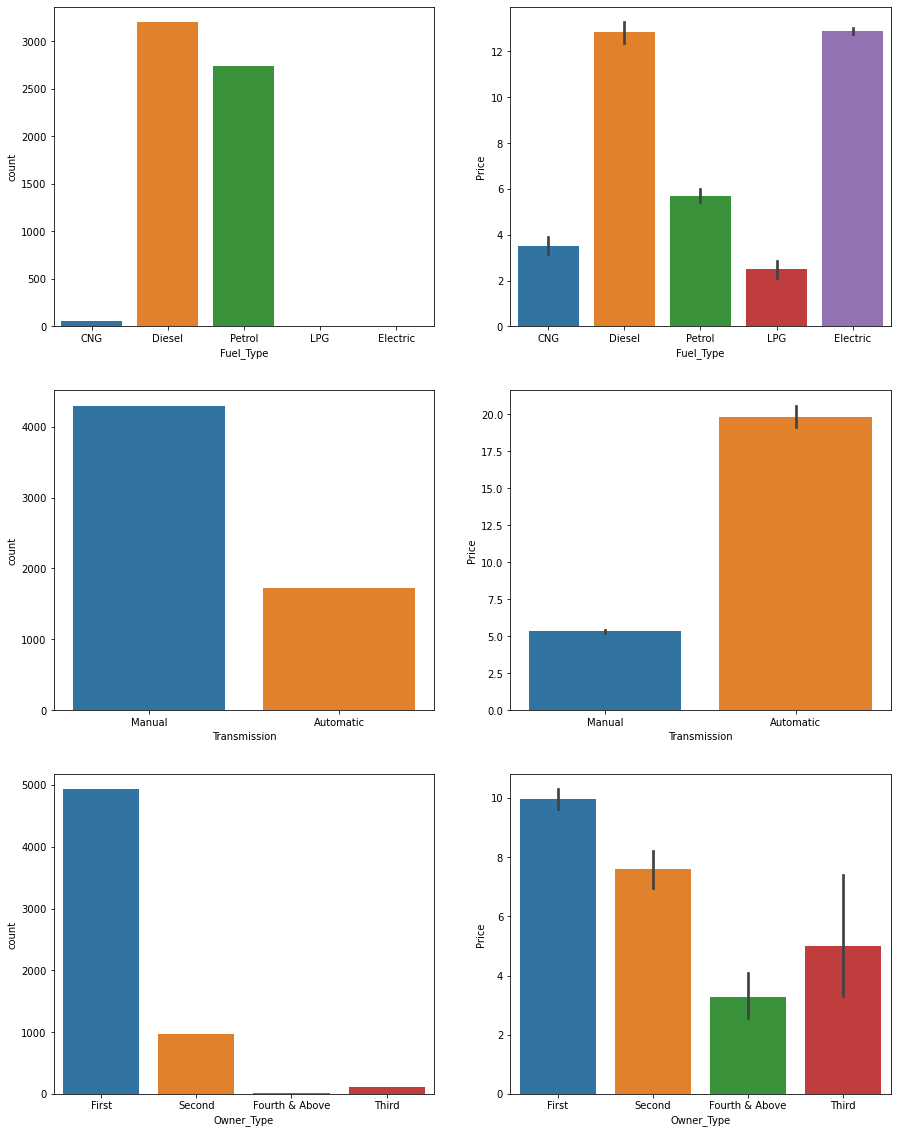

In [14]:
plt.figure(figsize=(15,20))
# Cross check against the dependent feature 
plt.subplot(3,2,1)
sns.countplot(x = 'Fuel_Type', data = car_df)
plt.subplot(3,2,2)
sns.barplot(x = 'Fuel_Type', y = 'Price', data = car_df)

plt.subplot(3,2,3)
sns.countplot(x = 'Transmission', data = car_df)
plt.subplot(3,2,4)
sns.barplot(x = 'Transmission', y = 'Price', data = car_df)

plt.subplot(3,2,5)
sns.countplot(x = 'Owner_Type', data = car_df)
plt.subplot(3,2,6)
sns.barplot(x = 'Owner_Type', y = 'Price', data = car_df)

# plt.subplot(1,2,2)
# sns.barplot(x = 'Transmission', y = 'Price', data = car_df)

### Inference
    1. Electric car price are too high
    2. Most cars are availabe as first owner 
    3. First car owner car price is slighly higer then higher no owners
    4. Automatic transmission car price is too high 

# Numerical Visualization

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

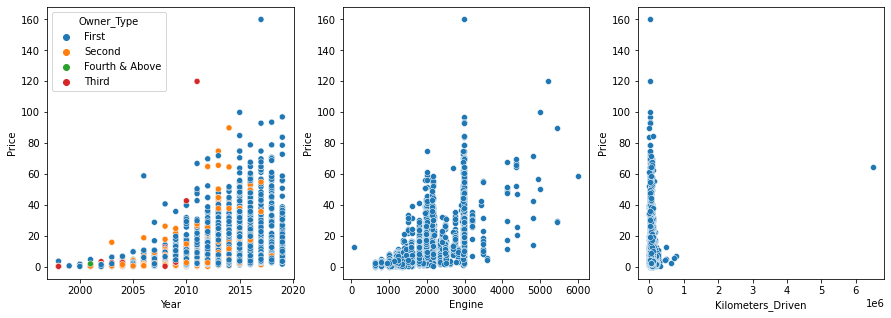

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.scatterplot(x = 'Year', y = 'Price', data = car_df, hue = "Owner_Type")

plt.subplot(1,3,2)
sns.scatterplot(x = 'Engine', y = 'Price', data = car_df)


plt.subplot(1,3,3)
sns.scatterplot(x = 'Kilometers_Driven', y = 'Price', data = car_df)


In [16]:
# Clear some data which is going beyond graph
car_df = car_df[car_df['Kilometers_Driven'] < 1000000]
car_df['Seats'].fillna(5, inplace = True)

C:\Users\Murugan\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
car_df['c_year'] = 2020
car_df['A_Year'] = car_df['c_year'] - car_df['Year']
# car_df.head()

# Replace the null values
car_df["Mileage"].fillna(car_df["Mileage"].mean(), inplace = True)
car_df["Engine"].fillna(car_df["Engine"].mean(), inplace = True)
car_df["Power"].fillna(car_df["Power"].mean(), inplace = True)



<ipython-input-17-dedee3c1360e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df['c_year'] = 2020
<ipython-input-17-dedee3c1360e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df['A_Year'] = car_df['c_year'] - car_df['Year']


In [18]:
car_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'c_year', 'A_Year'],
      dtype='object')

In [19]:
req_df = car_df[['A_Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price']]

req_df.head()

,A_Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,10,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,5,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,9,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,8,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,7,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [20]:
# Get dummies
def get_dummi(df, col):
    tmp = pd.get_dummies(req_df[col],  drop_first=True)
    df = pd.concat([df, tmp], axis = 1)
    df.drop([col], axis = 1, inplace = True)
    return df

df = get_dummi(req_df, 'Owner_Type')
df = get_dummi(df, 'Fuel_Type')
df = get_dummi(df, 'Transmission')

df.head()

,A_Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fourth & Above,Second,Third,Diesel,Electric,LPG,Petrol,Manual
0,10,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,0,1
1,5,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,1,0,0,0,1
2,9,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,0,0,1,1
3,8,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,1,0,0,0,1
4,7,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,1,0,0,0,0


<AxesSubplot:>

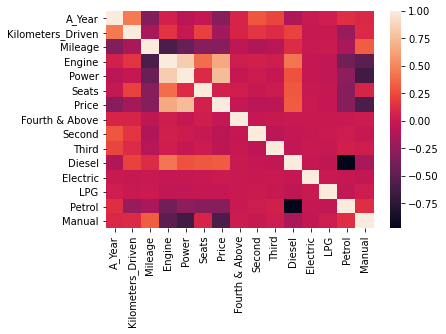

In [21]:
sns.heatmap(df.corr())

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [24]:

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.30, random_state=101)


In [25]:
# Findout feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[1.53772432e-01 4.89008657e-02 3.38452466e-02 1.16448468e-01
 2.64169741e-01 3.54096177e-02 1.29933205e-05 5.06475036e-03
 2.04693152e-03 5.95352338e-02 6.53648758e-05 1.02294437e-06
 5.30923445e-03 2.75418098e-01]


In [27]:
from sklearn.ensemble import RandomForestRegressor


In [42]:
# basic model without any estimator
rf_model = RandomForestRegressor()

In [53]:
# Hyper parameter 
n_estimator = [100, 200, 300, 400]
max_feature = ['auto', 'sqrt']
max_depth = [5, 10, 15, 20, 25, 30]
min_sample_split = [2, 5, 10, 15, 100]
min_sample_leaf = [1, 2, 5, 10]

random_grid = dict()
random_grid['n_estimators'] = n_estimator
random_grid['max_features'] = max_feature
random_grid['max_depth'] = max_depth
random_grid['min_samples_split'] = min_sample_split
random_grid['min_samples_leaf'] = min_sample_leaf
print(random_grid)

{'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [54]:
# Randomized search CV
from sklearn.model_selection import RandomizedSearchCV

In [55]:
rsv = RandomizedSearchCV( estimator = rf_model,
        param_distributions = random_grid,
        n_iter=10,
        scoring="neg_mean_squared_error",
        n_jobs=1,
        cv=5,
        verbose=2 ,
        random_state=42,
    )

In [56]:
rsv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.4s
[CV] n_estimators=200, min_sampl

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=300, min_samples_split=100, min_samples_lea

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   57.1s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
pred = rsv.predict(X_test)

C:\Users\Murugan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

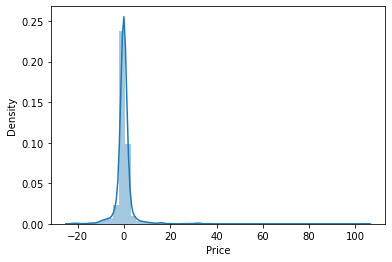

In [48]:
sns.distplot(y_test-pred)

C:\Users\Murugan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

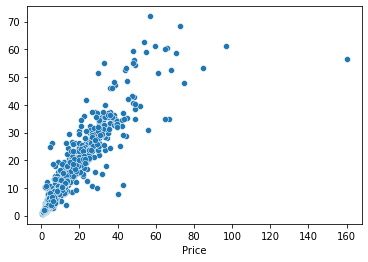

In [49]:
sns.scatterplot(y_test, pred)

In [50]:
import pickle

In [51]:
file = open("random_forest_regression_model.pkl", 'wb')

In [52]:
pickle.dump(rsv, file)